In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

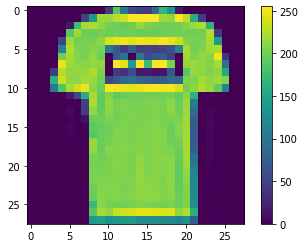

In [4]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
#plt.grid(False)
plt.show()

In [5]:
# so values are between 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3). 'softmax' means output has to be between 0 to 1
    # output layer suppose to have as many as neurons as possible,
    # at here we use 10 because that is the number of classes (class_names.length == 10)
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6242 - accuracy: 0.7791
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3814 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3146 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2781 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.8975
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.232

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8835
Test accuracy: 0.8834999799728394


In [10]:
predict = model.predict(test_images)
print(predict) # raw data, each row's length is same to number of classes, and each number is the possibility of being that class

[[9.49038395e-07 4.77574567e-08 2.59299810e-07 ... 8.03490654e-02
  1.68092072e-06 9.19231117e-01]
 [8.70954682e-05 5.61445489e-14 9.95609581e-01 ... 6.52868883e-18
  1.01294235e-08 1.79669897e-15]
 [4.02933829e-08 1.00000000e+00 1.63479005e-11 ... 2.88937621e-27
  1.02668769e-13 9.77941476e-18]
 ...
 [7.93745301e-07 1.09685178e-10 6.07757386e-07 ... 7.89621812e-10
  9.99973178e-01 1.50560377e-13]
 [2.72066558e-07 9.99991179e-01 5.33786437e-09 ... 4.97044145e-19
  8.62995364e-09 5.46383841e-11]
 [4.38061079e-06 1.77246703e-10 9.03090950e-06 ... 3.68054607e-03
  2.85924645e-04 1.60969121e-05]]


In [11]:
predict = [np.argmax(p) for p in predict]
print(predict) # raw data, each row's length is same to number of classes, and each number is the possibility of being that class

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 6, 6, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 0, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 2, 1, 4, 5, 6, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 6, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 4, 2, 2, 9, 7, 6, 5, 5, 4, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 4, 0, 6, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 6, 6, 4, 2, 4, 7, 1, 6, 4, 2, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 7, 6, 

Trouser


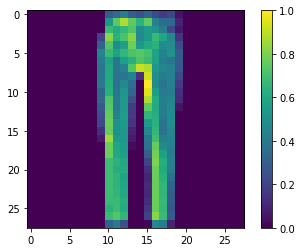

In [12]:
print(class_names[predict[137]])
plt.figure()
plt.imshow(train_images[137])
plt.colorbar()
#plt.grid(False)
plt.show()

Pick a number: 10000
Pick a number: 9999


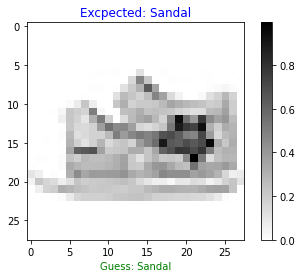

In [20]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label, color='b')
  plt.xlabel("Guess: " + guess, color='g')
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num < len(test_images):
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
